In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

<h2>Extract MNIST data</h2>
<p style="font-size:20px">You can change the option of one_hot encoding.

In [33]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

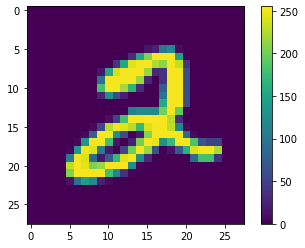

In [34]:
plt.figure()
plt.imshow(x_train[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [35]:
def get_batch(x_data, y_data, batch_size):
    i = np.random.randint(0, len(y_data), batch_size)
    return x_data[i,:,:], y_data[i]

In [36]:
epochs = 10
batch_size = 100

x_train = x_train/255
x_test = x_test/255
x_test = tf.Variable(x_test)

<h2>Define weight and bias</h2>

In [37]:
# weights connect to input layer
W1 = tf.Variable(tf.random.normal([784, 300], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random.normal([300]), name='b1')
# weights connect to the hidden layer to the output layer
W2 = tf.Variable(tf.random.normal([300, 10], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random.normal([10]), name='b2')

<h2>Define neural network</h2>

In [38]:
def nn_model(x_input, W1, b1, W2, b2):
    # flatten the input image from 28 x 28 to 784
    x_input = tf.reshape(x_input, (x_input.shape[0], -1))
    x = tf.add(tf.matmul(tf.cast(x_input, tf.float32), W1), b1) # convert to int32
    x = tf.nn.relu(x)
    logits = tf.add(tf.matmul(x, W2), b2) # unactivated output layer nodes
    return logits

<h2>Define cost function and accuracy</h2>

In [39]:
def loss_fn(logits, labels):
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels,
                                                                              logits=logits))
    return cross_entropy

<h2>Execute training</h2>

In [40]:
optimizer = tf.keras.optimizers.Adam()
total_batch = int(len(y_train) / batch_size)
for epoch in range(epochs):
    avg_loss = 0
    for i in range(total_batch):
        batch_x, batch_y = get_batch(x_train, y_train, batch_size=batch_size)
        # create tensors
        batch_x = tf.Variable(batch_x)
        batch_y = tf.Variable(batch_y)
        # create a one hot vector
        batch_y = tf.one_hot(batch_y, 10)
        with tf.GradientTape() as tape:
            logits = nn_model(batch_x, W1, b1, W2, b2)
            loss = loss_fn(logits, batch_y)
        gradients = tape.gradient(loss, [W1, b1, W2, b2])
        optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2]))
        avg_loss += loss / total_batch
    test_logits = nn_model(x_test, W1, b1, W2, b2)
    max_idxs = tf.argmax(test_logits, axis=1)
    test_acc = np.sum(max_idxs.numpy() == y_test) / len(y_test)
    print(f"Epoch: {epoch + 1}, loss={avg_loss:.3f}, accuracy={test_acc*100:.3f}%")

Epoch: 1, loss=0.381, accuracy=94.070%
Epoch: 2, loss=0.163, accuracy=95.830%
Epoch: 3, loss=0.111, accuracy=96.650%
Epoch: 4, loss=0.082, accuracy=97.180%
Epoch: 5, loss=0.064, accuracy=97.500%
Epoch: 6, loss=0.050, accuracy=97.410%
Epoch: 7, loss=0.038, accuracy=97.680%
Epoch: 8, loss=0.032, accuracy=97.810%
Epoch: 9, loss=0.027, accuracy=97.790%
Epoch: 10, loss=0.023, accuracy=97.880%


<h2>Your results</h2>